# This notebook uses the DarkSky API to collect historical weather data for a given city

To get set up, first retrieve an API from darksky.net

In [6]:
from NOAA_token import dark_sky_api
import datetime
import pandas as pd
import forecastio
import getpass
import matplotlib.pyplot as plt
import numpy as np

In [218]:
#set API key:

api_key = dark_sky_api

In [216]:
#austin tx coords:
lat = 30.25
lng = -97.25

sf_lat = 37.7749
sf_lon = -122.4194

stockton_lat = 37.9577
stockton_lon = -121.2908

oakland_lat = 37.8044 
oakland_lon = -122.2711

In [219]:
attributes = ["temperature", "humidity"]

In [333]:
#initialize df and dictionary into which to collect data:

times = []
data = {}
for attr in attributes:
    data[attr] = []

In [335]:
#collect data for a given time point, in this case 2 days beginning july 1 2017
start = datetime.datetime(2017, 7, 1)
for offset in range(0, 4):
    forecast = forecastio.load_forecast(api_key, stockton_lat, stockton_lon, time=start+datetime.timedelta(offset), units="us")
    h = forecast.hourly()
    d = h.data
    for p in d:
        times.append(p.time)
        for attr in attributes:
            data[attr].append(p.d[attr])

In [338]:
df = pd.DataFrame(data, index=times)
df.head()

,temperature,humidity
2017-07-01 07:00:00,65.51,0.58
2017-07-01 08:00:00,63.29,0.63
2017-07-01 09:00:00,60.66,0.68
2017-07-01 10:00:00,59.45,0.70
2017-07-01 11:00:00,58.61,0.73


In [339]:
#build the above functionality into a function that builds dataframes:

def df_builder(lat, lon, start_y, start_m, start_d, num_days):
    
    """
    returns a pandas df with airtemp and humidity data for the specified location and time range. 
    """
    
    times = []
    data = {}
    for attr in attributes:
        data[attr] = []

    
    start = datetime.datetime(start_y , start_m , start_d)
    for offset in range(0, num_days):
        forecast = forecastio.load_forecast(api_key, lat, lon, time=start+datetime.timedelta(offset), units="us")
        h = forecast.hourly()
        d = h.data
        for p in d:
            times.append(p.time)
            for attr in attributes:
                data[attr].append(p.d[attr])
    return pd.DataFrame(data, index=times)


In [349]:
#build a df with all stockton data from july:

stockton_july_data = df_builder(stockton_lat, stockton_lon, 2018, 7, 1, 30)

In [355]:
stockton_july_data.tail()

,temperature,humidity
2018-07-31 02:00:00,92.12,0.31
2018-07-31 03:00:00,88.96,0.32
2018-07-31 04:00:00,83.53,0.35
2018-07-31 05:00:00,77.24,0.41
2018-07-31 06:00:00,75.22,0.44


In [351]:
#note that the default time given on the indices is in UTC. to convert to pacific time, use the localize and 
#convert tz methods:

stockton_july_data_converted = stockton_july_data.tz_localize("UTC").tz_convert("US/Pacific")

In [382]:
#write df to csv file for later use:

stockton_july_data_converted.to_csv("stockton_july_temp_humidity.csv", encoding='utf-8', index=True)

In [393]:
#build stockton dataset for june:

stockton_june_data = df_builder(stockton_lat, stockton_lon, 2018, 6, 1, 29)

In [396]:
#convert time stamps and save to csv:

stockton_june_data_converted = stockton_june_data.tz_localize("UTC").tz_convert("US/Pacific")
stockton_june_data_converted.to_csv("stockton_june_temp_humidity.csv", encoding='utf-8', index=True)

In [425]:
#generate additional datasets:

stockton_may_data = df_builder(stockton_lat, stockton_lon, 2018, 5, 1, 30)
stockton_april_data = df_builder(stockton_lat, stockton_lon, 2018, 4, 1, 29)
stockton_may_data_converted = stockton_may_data.tz_localize("UTC").tz_convert("US/Pacific")
stockton_april_data_converted = stockton_april_data.tz_localize("UTC").tz_convert("US/Pacific")
stockton_may_data_converted.to_csv("stockton_may_temp_humidity.csv", encoding='utf-8', index=True)
stockton_april_data_converted.to_csv("stockton_april_temp_humidity.csv", encoding='utf-8', index=True)

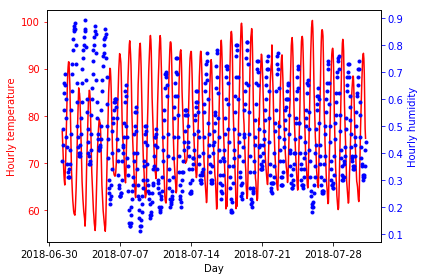

In [388]:
#visualize temperature and humidity during july for stockton:

fig, ax1 = plt.subplots()
t = stockton_july_data["temperature"] #np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
ax1.plot(t,'r-')
ax1.set_xlabel('Day')
ax1.set_ylabel('Hourly temperature', color='r')
ax1.tick_params('y', colors='r')
ax2 = ax1.twinx()
s2 = stockton_july_data["humidity"]
ax2.plot(s2, 'b.')
ax2.set_ylabel('Hourly humidity', color='b')
ax2.tick_params('y', colors='b')
fig.tight_layout()
plt.show()



In [ ]:
print(np.corrcoef(stockton_july_data["temperature"], stockton_july_data["humidity"]))
plt.plot(stockton_july_data["temperature"], stockton_july_data["humidity"], "g.")

In [10]:
april = pd.read_csv("stockton_april_temp_humidity.csv")
may = pd.read_csv("stockton_may_temp_humidity.csv")

june = pd.read_csv("stockton_june_temp_humidity.csv")
july = pd.read_csv("stockton_july_temp_humidity.csv")


In [13]:
#generate series for plotting. Here the height for humidity data is scaled. 

t = april["temperature"].append(may["temperature"]).append(june["temperature"]).append(july["temperature"])
s2 = april["humidity"].append(may["humidity"]).append(june["humidity"]).append(july["humidity"])
#s2_scale = 100*s2


In [2]:
#plot data with bokeh:

from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure
from bokeh.models import LinearAxis, Range1d

In [10]:
#set x values as a range (placeholder for dates)

x = range(0,len(t))
bfig = figure(tools="pan,box_zoom,reset,save", title="temp and humidity in stockton")
bfig.line(x, t, line_width = 2, line_color = "red")
show(bfig)

In [16]:
#generate bokeh figure:

s1 = figure(tools="pan,box_zoom,reset,save", title="temp and humidity in stockton", plot_width=1000,
           plot_height=600)

s1.extra_y_ranges = {"foo": Range1d(start=0, end=1)}
s1.add_layout(LinearAxis(y_range_name="foo"), 'right')         
s1.line(x, t, line_width = 2, line_color = "red")
s1.scatter(x, s2_scale)


# Show the combined graphs with twin y axes.
show(s1)

In [15]:
s2 = figure(tools="pan,box_zoom,reset,save", title="temp vs humidity in stockton", plot_width=1000,
           plot_height=600)

        

s2.scatter(t, s2_scale, color="green")


# Show the combined graphs with twin y axes.
show(s2)